In [6]:
import os
try:
    path_initialized
except NameError:
    path_initialized = True
    os.chdir('..')

import json
import matplotlib.pyplot as plt
import swiper.plot as plotter
import numpy as np

In [12]:
with open(f'benchmarks/data/decoder_dists.json', 'r') as f:
    decoder_dists = json.load(f)

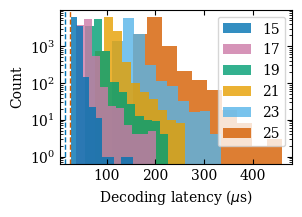

In [13]:
fig,ax = plt.subplots(figsize=(3,2))

distances = [15, 17, 19, 21, 23, 25]
for i,dist in reversed(list(enumerate(distances))):
    ax.hist(decoder_dists[str(dist)]['2'], label=f'{dist}', color=f'C{i}', alpha=0.8)
    if dist in [15, 25]:
        plt.axvline(dist, color=f'C{i}', linestyle='--', linewidth=1)
    # plt.hist(decoder_dists[str(dist)]['2'], color=f'C{i}', histtype='step', linewidth=1, alpha=0.3)
ax.set_yscale('log')
ax.set_xlabel(r'Decoding latency ($\mu$s)')
ax.set_ylabel('Count')
# inward ticks
ax.tick_params(direction='in', which='both', right=True, top=True)

# reverse entried in legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

plt.savefig('notebooks/figures/decoder_dists.svg', bbox_inches='tight')
plt.savefig('notebooks/figures/decoder_dists.pdf', bbox_inches='tight')

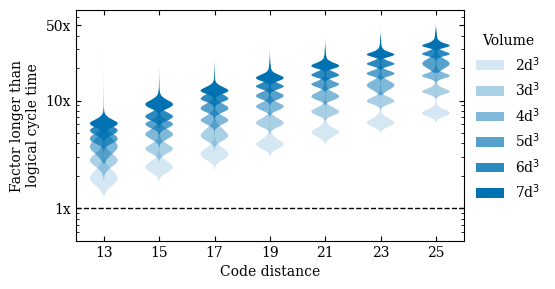

In [15]:
fig,ax = plt.subplots(figsize=(5,3))

distances = [13, 15, 17, 19, 21, 23, 25]
volumes = [2,3,4,5,6,7]
for i,dist in reversed(list(enumerate(distances))):
    for volume_str,data in decoder_dists[str(dist)].items():
        volume = int(volume_str)
        parts = ax.violinplot(np.array(data)/dist, positions=[i], vert=True, showextrema=False, points=1000)
        for pc in parts['bodies']:
            pc.set_alpha((volumes.index(volume)+1) / len(volumes))
            pc.set_facecolor(f'C0')

# discrete color scale using C0, showing that each volume is a different alpha
for i,volume in enumerate(volumes):
    ax.hist([-1], color='C0', label=f'{volume}'+r'd$^3$', alpha=(i+1) / len(volumes))

plt.axhline(1, color='black', linestyle='--', linewidth=1)
# ax.set_yscale('log')
ax.set_yscale('log')
ax.set_ylabel('Factor longer than\nlogical cycle time')
ax.set_xlabel('Code distance')
# inward ticks
ax.tick_params(direction='in', which='both', right=True, top=True)
# ax.set_xticks([1,5,10,15], ['1x', '5x', '10x', '15x'])
ax.set_yticks([1,10,50], ['1x', '10x', '50x'])
ax.set_ylim(0.5, 70)
ax.set_xlim(-0.5, len(distances)-0.5)
ax.set_xticks(range(len(distances)), distances)

# reverse entried in legend
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(reversed(handles), reversed(labels))
ax.legend(title='Volume', frameon=False, ncol=1, bbox_to_anchor=(1, 0.95), loc='upper left')

plt.savefig('notebooks/figures/decoder_dists.svg', bbox_inches='tight')
plt.savefig('notebooks/figures/decoder_dists.pdf', bbox_inches='tight')

In [6]:
# save new json with median values
decoder_dists_median = {}
for dist in decoder_dists:
    decoder_dists_median[dist] = {}
    for i in decoder_dists[dist]:
        decoder_dists_median[dist][i] = [int(np.median(decoder_dists[dist][i]))]
with open(f'benchmarks/data/decoder_dists_median.json', 'w') as f:
    json.dump(decoder_dists_median, f)

In [7]:
decoder_dists_median

{'13': {'2': [26], '3': [37], '4': [50], '5': [59], '6': [70], '7': [81]},
 '15': {'2': [37], '3': [54], '4': [75], '5': [92], '6': [109], '7': [141]},
 '17': {'2': [56], '3': [84], '4': [114], '5': [147], '6': [182], '7': [214]},
 '19': {'2': [76], '3': [120], '4': [170], '5': [213], '6': [262], '7': [314]},
 '21': {'2': [108],
  '3': [169],
  '4': [235],
  '5': [302],
  '6': [371],
  '7': [450]},
 '23': {'2': [146],
  '3': [232],
  '4': [321],
  '5': [416],
  '6': [513],
  '7': [626]},
 '25': {'2': [195],
  '3': [308],
  '4': [432],
  '5': [555],
  '6': [691],
  '7': [824]}}

In [12]:
# save new json with median values
decoder_dists_nd = {}
for dist in decoder_dists:
    decoder_dists_nd[dist] = {}
    for i in decoder_dists[dist]:
        decoder_dists_nd[dist][i] = [int(dist)*int(i)]
with open(f'benchmarks/data/decoder_dists_nd.json', 'w') as f:
    json.dump(decoder_dists_nd, f)

In [13]:
decoder_dists_nd

{'13': {'2': [26], '3': [39], '4': [52], '5': [65], '6': [78], '7': [91]},
 '15': {'2': [30], '3': [45], '4': [60], '5': [75], '6': [90], '7': [105]},
 '17': {'2': [34], '3': [51], '4': [68], '5': [85], '6': [102], '7': [119]},
 '19': {'2': [38], '3': [57], '4': [76], '5': [95], '6': [114], '7': [133]},
 '21': {'2': [42], '3': [63], '4': [84], '5': [105], '6': [126], '7': [147]},
 '23': {'2': [46], '3': [69], '4': [92], '5': [115], '6': [138], '7': [161]},
 '25': {'2': [50], '3': [75], '4': [100], '5': [125], '6': [150], '7': [175]}}